In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import seaborn as sns

In [2]:
df = pd.read_csv("tel_churn_new.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
x = df.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [5]:
y = df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

test_train_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# 1. Decision Tree Classifier

In [7]:
model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [8]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [9]:
y_pred = model.predict(x_test)

In [10]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
model.score(x_test,y_test)

0.8081023454157783

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1021
           1       0.71      0.51      0.59       386

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [13]:
sm = SMOTEENN()
X_resampled,y_resampled = sm.fit_resample(x,y)
x_r_train,x_r_test,y_r_train,y_r_test = train_test_split(X_resampled,y_resampled,test_size=0.2)
model_smote = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [14]:
model_smote.fit(x_r_train,y_r_train)
y_r_predict = model_smote.predict(x_r_test)
model_score_r = model_smote.score(x_r_test,y_r_test)
print(model_score_r)
print(metrics.classification_report(y_r_test,y_r_predict))

0.9178662150719729
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       497
           1       0.93      0.93      0.93       684

    accuracy                           0.92      1181
   macro avg       0.92      0.92      0.92      1181
weighted avg       0.92      0.92      0.92      1181



<AxesSubplot:>

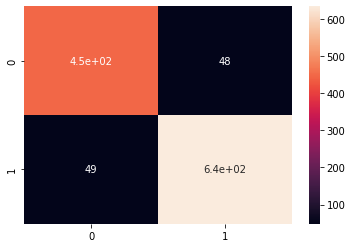

In [15]:
cm =confusion_matrix(y_r_test,y_r_predict)
sns.heatmap(cm,annot = True)

# 2. Logistic Regression

In [16]:
# Train and Test Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_predict = model_LR.predict(x_test)

In [18]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1021
           1       0.74      0.52      0.61       386

    accuracy                           0.82      1407
   macro avg       0.79      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407



<AxesSubplot:>

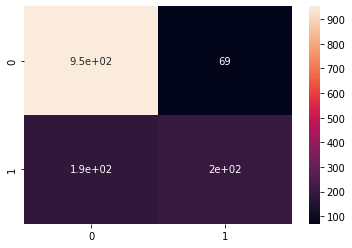

In [19]:
import seaborn as sns
# Print out the confusion matrix and comment on the results
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot = True)

# SVM

In [20]:
# from sklearn.calibration import CalibratedClassifierCV  #for probability Score output
# from sklearn.svm import LinearSVC
# model_svm = LinearSVC(max_iter = 1000000)
# model_svm = CalibratedClassifierCV(model_svm)
# model_svm.fit(x_train,y_train)

In [21]:
# y_predict = model_svm.predict(x_test)

In [22]:
# print(classification_report(y_test,y_predict))

# Random Forest Classifier

# 1.

In [23]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_predict = model_rf.predict(x_test)

In [25]:
model_rf.score(x_test,y_test)

0.8137882018479033

In [26]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1021
           1       0.72      0.52      0.61       386

    accuracy                           0.81      1407
   macro avg       0.78      0.72      0.74      1407
weighted avg       0.81      0.81      0.80      1407



<AxesSubplot:>

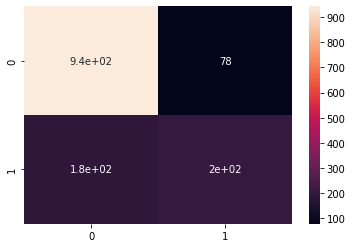

In [27]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

# 2.

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_rf_2 = RandomForestClassifier(n_estimators=100, criterion='gini',random_state = 100,max_depth=6, min_samples_leaf=8)

In [30]:
model_rf_2.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [31]:
y_pred = model_rf_2.predict(x_test)

In [32]:
model_rf_2.score(x_test,y_test)

0.8109452736318408

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1021
           1       0.75      0.46      0.57       386

    accuracy                           0.81      1407
   macro avg       0.79      0.70      0.73      1407
weighted avg       0.80      0.81      0.79      1407



<AxesSubplot:>

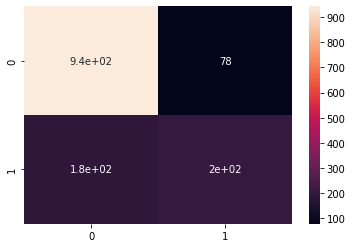

In [34]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [35]:
sm = SMOTEENN()
X_resampled_1,y_resampled_1 = sm.fit_resample(x,y)

In [36]:
x_r_train_1,x_r_test_1,y_r_train_1,y_r_test_1 = train_test_split(X_resampled_1,y_resampled_1)

In [37]:
model_rf1_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [38]:
model_rf1_smote.fit(x_r_train_1,y_r_train_1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [39]:
y_r_predict_1 = model_rf1_smote.predict(x_r_test_1)

In [40]:
model_score_r_1 =model_rf1_smote.score(x_r_test_1,y_r_test_1)

In [41]:
print(model_score_r_1)
print(metrics.classification_report(y_r_test_1,y_r_predict_1))

0.9413369713506139
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       639
           1       0.93      0.97      0.95       827

    accuracy                           0.94      1466
   macro avg       0.94      0.94      0.94      1466
weighted avg       0.94      0.94      0.94      1466



<AxesSubplot:>

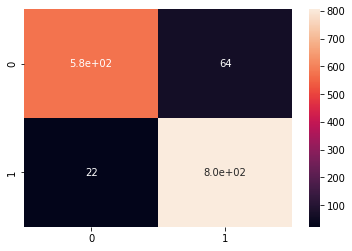

In [42]:
cm = confusion_matrix(y_r_test_1,y_r_predict_1)
sns.heatmap(cm,annot=True)

# Performing PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
x_r_train_pca = pca.fit_transform(x_r_train_1)
x_r_test_pca = pca.fit_transform(x_r_test_1)
explained_variance = pca.explained_variance_ratio_

In [44]:
model_with_pca=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [45]:
model_with_pca.fit(x_r_train_pca,y_r_train_1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [46]:
y_r_predict_pca = model_with_pca.predict(x_r_test_pca)

In [47]:
model_score_r_pca = model_with_pca.score(x_r_test_pca,y_r_test_1)

In [48]:
print(model_score_r_pca)
print(metrics.classification_report(y_r_test_1,y_r_predict_pca))

0.6916780354706685
              precision    recall  f1-score   support

           0       0.65      0.62      0.64       639
           1       0.72      0.74      0.73       827

    accuracy                           0.69      1466
   macro avg       0.69      0.68      0.68      1466
weighted avg       0.69      0.69      0.69      1466



In [49]:
# By performing PCA we have not get better results hence continue with RF reults.

Pickle the Model

In [50]:
import pickle

In [51]:
filename = 'model_rf.sav'

In [52]:
pickle.dump(model_rf1_smote,open(filename,'wb'))

In [53]:
load_model = pickle.load(open(filename,'rb'))

In [54]:
model_score_r_1 = load_model.score(x_r_test_1,y_r_test_1)

In [55]:
model_score_r_1

0.9413369713506139

model_rf.sav file is created for model RF Classifier using SMOTEENN

In [56]:
x_r_test_1.shape

(1466, 50)

In [57]:
x_train.shape

(5625, 50)

In [58]:
x_train.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
5686,0,80.45,5737.60,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1870,0,114.10,8086.40,0,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1607,0,87.40,5918.80,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3486,0,29.20,98.50,1,0,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
2773,0,74.65,966.25,1,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
